In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,BatchNormalization,Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
x_train /= 255 #inputs have to be between [0, 1]
x_test /= 255

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
model = Sequential()

#first convolution layer
model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(BatchNormalization(axis=3))
#the axis that should be normalized (typically the features axis).
#For instance, after a `Conv2D` layer with
# data_format="channels_first"
# set axis=1 in BatchNormalization.

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#flatten layer
model.add(Flatten())

#dense layer
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

#Output layer
model.add(Dense(10,activation='softmax'))

In [6]:
import matplotlib.pyplot as plt
batch_size=64

In [8]:
gen = ImageDataGenerator(featurewise_center=True,
                         featurewise_std_normalization=True,
                         rotation_range=90,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         horizontal_flip=True,
                         vertical_flip=True,
                         fill_mode='nearest',
                         brightness_range=[.3,1.0])

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
gen.fit(x_train)

Values less than 1.0 darken the image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, e.g. [1.0, 1.5], where 1.0 has no effect on brightness.

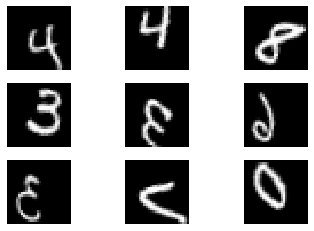

In [9]:

for X_batch, y_batch in gen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(X_batch[i].reshape(28,28), cmap='gray')
        plt.axis('off')
    # show the plot
    plt.show()
    break
    

In [10]:
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)



In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
no_of_batches = x_train.shape[0]//batch_size
no_of_batches

937

In [13]:
from keras.callbacks import ModelCheckpoint, TensorBoard
best_model = ModelCheckpoint("cnn_mnist_best.h5", 
                             monitor='val_accuracy', 
                             verbose=0, 
                             save_best_only=True)

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
history=model.fit_generator(train_generator,
                    steps_per_epoch=no_of_batches,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[best_model])


Epoch 1/10
937/937 [==============================] - 43s 46ms/step - loss: 0.1323 - accuracy: 0.9581 - val_loss: 0.0527 - val_accuracy: 0.9835
Epoch 2/10
937/937 [==============================] - 43s 46ms/step - loss: 0.0524 - accuracy: 0.9842 - val_loss: 0.0300 - val_accuracy: 0.9900
Epoch 3/10
937/937 [==============================] - 44s 47ms/step - loss: 0.0373 - accuracy: 0.9884 - val_loss: 0.0334 - val_accuracy: 0.9894
Epoch 4/10
937/937 [==============================] - 44s 47ms/step - loss: 0.0335 - accuracy: 0.9898 - val_loss: 0.0412 - val_accuracy: 0.9876
Epoch 5/10
937/937 [==============================] - 43s 46ms/step - loss: 0.0285 - accuracy: 0.9903 - val_loss: 0.0353 - val_accuracy: 0.9894
Epoch 6/10
937/937 [==============================] - 42s 45ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0237 - val_accuracy: 0.9921
Epoch 7/10
937/937 [==============================] - 43s 46ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0262 - val_accuracy

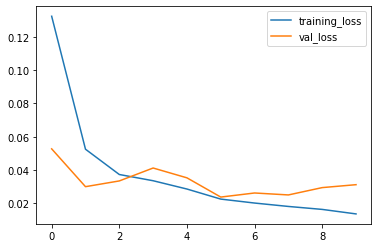

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
x = len(loss)
plt.plot(range(x),loss,label='training_loss')
plt.plot(range(x),val_loss,label='val_loss')
plt.legend()

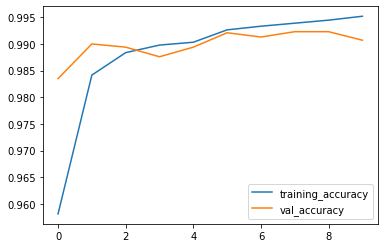

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
x = len(loss)
plt.plot(range(x),acc,label='training_accuracy')
plt.plot(range(x),val_acc,label='val_accuracy')
plt.legend()

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

Test loss: 0.031165658431643102
Test accuracy: 99.07000064849854


In [21]:
from keras.models import load_model

In [22]:
m1 = load_model('cnn_mnist_best.h5')

In [23]:
score = m1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

Test loss: 0.025004726630518326
Test accuracy: 99.22999739646912


In [25]:
m1.predict_classes(x_test[0].reshape(1,28,28,1))

array([7])